# Github Live Tracker Project -- Demo and Explanation

In [1]:
import os

os.environ[
    'ACCESS_TOKEN'] = 'add your token'

### New Repo Processor Demo -- Interesting insights about Valentyn's nickname

Task:
> Highlight the new projects that included the searched keyword. (Assume you have a data store that stores all streamed data so you can track if the given project was there before or not)

For demo purposes, as a datastore, we would use prepopulated in-memory dictionary.

Let's search for Valentyn's github nickname -- `BaLiKfromUA`


In [2]:
from reactivex import Observable

import github_client as gh
import new_repo_processor as new_repo
from message import GithubEvent

from new_repo_processor import ReposPerKeywordStorage

keyword = "BaLiKfromUA"

storage: ReposPerKeywordStorage = {
    keyword: {"BaLiKfromUA/pylox"}  # store Valentyn's repo which contains his nickname in README links
}

fetched_data: Observable[GithubEvent] = gh.fetch_data_as_observable(keyword)  # get GH data as stream
data_processor = new_repo.filter_new_repos(storage)  # carry storage with data processor

data_pipeline = data_processor(fetched_data)  # pipe fetched data and data processor

# output relevant repo names
data_pipeline.subscribe(
    on_next=lambda event: print(f"For keyword {event.keyword}, new repo was found -- {event.repo_name}"),
    on_error=print,
    on_completed=lambda: print("New repo tracking completed")
)

For keyword BaLiKfromUA, new repo was found -- darkbot-reloaded/DarkBotAPI
New repo tracking completed


If we check [darkbot-reloaded/DarkBotAPI](https://github.com/darkbot-reloaded/DarkBotAPI) for given keyword, we would find a link to Valentyn's old gist, lol.

[https://github.com/darkbot-reloaded/DarkBotAPI/blob/9a9ca286a3d309d589b69ca4ab841339a176bf3d/config/pmd/pmd-rules.xml#L88](https://github.com/darkbot-reloaded/DarkBotAPI/blob/9a9ca286a3d309d589b69ca4ab841339a176bf3d/config/pmd/pmd-rules.xml#L88)

### Language statistics demo -- todolist implementations
Task:
> 
Let's search for projects which use `velox.api.layer0` dependency and get a statistics about such projects

Lang stats calculation completed


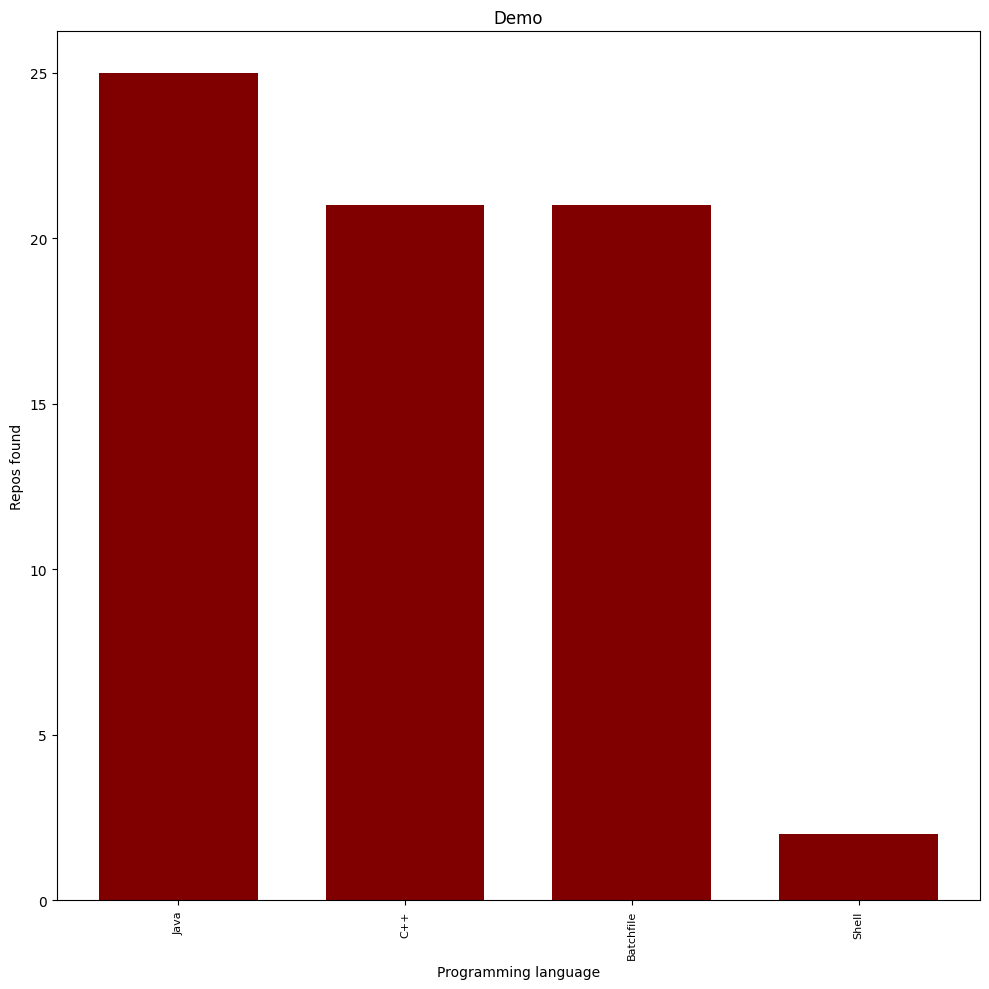

In [2]:
import matplotlib.pyplot as plt
from reactivex import Observable

import github_client as gh
import language_stats_processor as lang
from message import GithubEvent

keyword = "velox.api.layer0"

fetched_data: Observable[GithubEvent] = gh.fetch_data_as_observable(keyword)  # get GH data as stream
data_processor = lang.get_lang_stats(dict())  # carry in-memory storage with data processor

data_pipeline = data_processor(fetched_data)  # pipe fetched data and data processor

stats = {}

def setter(event: lang.LangStats):
    stats[event.lang] = event.cnt


data_pipeline.subscribe(on_next=setter, on_error=print,
                        on_completed=lambda: print("Lang stats calculation completed"))

langs = list(stats.keys())
cnts = list(stats.values())

fig = plt.figure(figsize=(10, 10))
plt.bar(langs, cnts, color='maroon', width=0.7)

plt.xlabel("Programming language")
plt.ylabel("Repos found")
plt.title("Demo")

# Adjust font size and rotation for better readability
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

A fact that Java is leading connected to the fact that library is written on Java so stats look good!